In [8]:
# import the necessary packages

%matplotlib inline

from imutils.perspective import four_point_transform
from matplotlib import pyplot as plt
import pytesseract
import numpy as np
import imutils
import cv2
import re

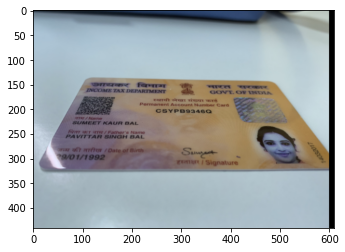

In [32]:
image_filename = r'C:\Users\anmol\Pictures\pan2.png'

orig = cv2.imread(image_filename)
image = orig.copy()
image = imutils.resize(image, width=600)
ratio = orig.shape[1] / float(image.shape[1])

image = cv2.copyMakeBorder(image, 0, 0, 0, 10, cv2.BORDER_CONSTANT)

plt.imshow(image)
plt.show()

In [33]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## sharpen
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpened = cv2.filter2D(gray, -1, kernel)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(blurred, 30, 150)
# detect contours in the edge map, sort them by size (in descending
# order), and grab the largest contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
# initialize a contour that corresponds to the business card outline
cardCnt = None

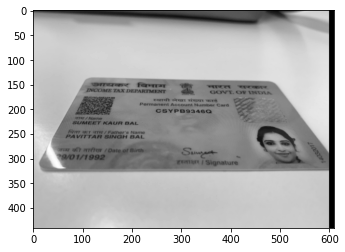

In [34]:
plt.imshow(gray, cmap='gray')
plt.show()

In [9]:
cv2.imwrite("file.jpeg", gray)

True

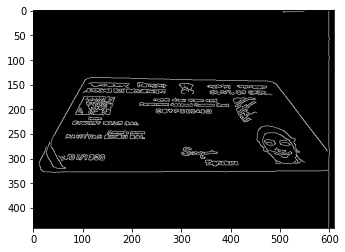

In [35]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))#, cmap='gray')
plt.show()

In [36]:
# loop over the contours
largest = 0.0
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if this is the first contour we've encountered that has four
    # vertices, then we can assume we've found the business card
    print(area, len(approx))
    if len(approx) >= 4 and area > largest:
        cardCnt = approx
        largest = area
#         break
        
# if the business card contour is empty then our script could not
# find the outline of the card, so raise an error
if cardCnt is None:
    raise Exception(("Could not find receipt outline. Try debugging your edge detection and contour steps."))

4365.5 9
414.0 11
377.0 8
372.0 12
249.5 4


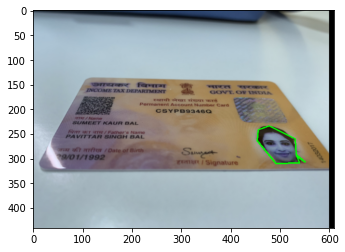

In [37]:
# check to see if we should draw the contour of the business card
# on the image and then display it to our screen
output = image.copy()
cv2.drawContours(output, [cardCnt], -1, (0, 255, 0), 2)
# cv2.imshow("Business Card Outline", output)
plt.imshow(output)
plt.show()

In [ ]:
# apply a four-point perspective transform to the *original* image to
# obtain a top-down bird's-eye view of the business card
card = four_point_transform(orig, cardCnt.reshape(4, 2) * ratio)
# show transformed image
cv2.imshow("Business Card Transform", card)

In [ ]:
# convert the business card from BGR to RGB channel ordering and then
# OCR it
rgb = cv2.cvtColor(card, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(rgb)

# use regular expressions to parse out phone numbers and email
# addresses from the business card
phoneNums = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', text)
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)

# attempt to use regular expressions to parse out names/titles (not
# necessarily reliable)
nameExp = r"^[\w'\-,.][^0-9_!¡?÷?¿/\\+=@#$%^&*(){}|~<>;:[\]]{2,}"
names = re.findall(nameExp, text)

In [ ]:
!pip install easyocr

In [20]:
import easyocr

image_filename = "/home/anmol/Pictures/Selection_001.png"

orig = cv2.imread(image_filename)
image = orig.copy()
image = imutils.resize(image, width=600)
ratio = orig.shape[1] / float(image.shape[1])

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

reader = easyocr.Reader(['en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(gray)
result = sorted(result, key=lambda x: x[2], reverse=True)
result

Using CPU. Note: This module is much faster with a GPU.


[([[44, 248], [178, 248], [178, 274], [44, 274]],
  'DTDPS6672B',
  0.9953169355536255),
 ([[45, 333], [117, 333], [117, 351], [45, 351]],
  'Signature',
  0.987872713007143),
 ([[44, 114], [170, 114], [170, 138], [44, 138]],
  'RAJAT SINHA',
  0.9800400110957574),
 ([[47, 221], [249, 221], [249, 239], [47, 239]],
  'Permanent Account Number',
  0.9640361092471899),
 ([[380, 68], [564, 68], [564, 100], [380, 100]],
  'GOVT. OF INDIA',
  0.9583638780674195),
 ([[44, 178], [140, 178], [140, 202], [44, 202]],
  '11/10/1993',
  0.8358560245056692),
 ([[44, 146], [202, 146], [202, 170], [44, 170]],
  'PARITOSH SINHA',
  0.6811483184804898),
 ([[44, 69], [263, 69], [263, 100], [44, 100]],
  'INCOMETAX DEPARTMENT',
  0.6592026497677728),
 ([[54.654654412007375, 294.5201198532081],
   [94.77857560463629, 291.08530397475846],
   [96.34534558799263, 308.4798801467919],
   [56.221424395363705, 310.91469602524154]],
  'Za',
  0.24795982108341313),
 ([[377, 29], [456, 29], [456, 61], [377, 61]], 'H

In [23]:
list(filter(lambda x: x[2]>0.5, result))

[([[44, 248], [178, 248], [178, 274], [44, 274]],
  'DTDPS6672B',
  0.9953169355536255),
 ([[45, 333], [117, 333], [117, 351], [45, 351]],
  'Signature',
  0.987872713007143),
 ([[44, 114], [170, 114], [170, 138], [44, 138]],
  'RAJAT SINHA',
  0.9800400110957574),
 ([[47, 221], [249, 221], [249, 239], [47, 239]],
  'Permanent Account Number',
  0.9640361092471899),
 ([[380, 68], [564, 68], [564, 100], [380, 100]],
  'GOVT. OF INDIA',
  0.9583638780674195),
 ([[44, 178], [140, 178], [140, 202], [44, 202]],
  '11/10/1993',
  0.8358560245056692),
 ([[44, 146], [202, 146], [202, 170], [44, 170]],
  'PARITOSH SINHA',
  0.6811483184804898),
 ([[44, 69], [263, 69], [263, 100], [44, 100]],
  'INCOMETAX DEPARTMENT',
  0.6592026497677728)]

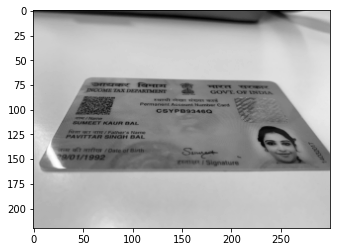

In [40]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

image_filename = r'C:\Users\anmol\Pictures\pan2.png'

image = cv2.imread(image_filename)
image = imutils.resize(image, width=300)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

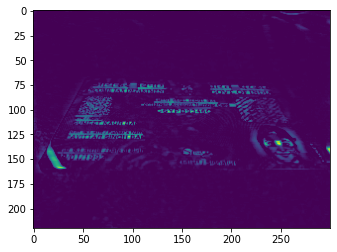

In [41]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt.imshow(tophat)
plt.show()

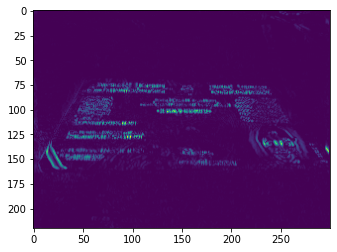

In [44]:
gradX = cv2.Sobel(tophat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype("uint8")

plt.imshow(gradX)
plt.show()

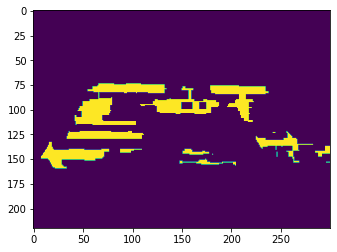

In [47]:
# apply a closing operation using the rectangular kernel to help
# cloes gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(gradX, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)

plt.imshow(thresh)
plt.show()

In [48]:
# find contours in the thresholded image, then initialize the
# list of digit locations
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

In [49]:
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the bounding box of the contour, then use the
    # bounding box coordinates to derive the aspect ratio
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # since credit cards used a fixed size fonts with 4 groups
    # of 4 digits, we can prune potential contours based on the
    # aspect ratio
    if ar > 2.5 and ar < 4.0:
        # contours can further be pruned on minimum/maximum width
        # and height
        if (w > 40 and w < 55) and (h > 10 and h < 20):
            # append the bounding box region of the digits group
            # to our locations list
            locs.append((x, y, w, h))
            
locs

[]

In [24]:
# first install face_recognition
# pip install --upgrade face_recognition
def is_image_upside_down(img):
    import face_recognition
    face_locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, face_locations)
    image_is_upside_down = (len(encodings) == 0)
    return image_is_upside_down

import cv2
filename = '/home/anmol/Pictures/Selection_001.png'

# Load file, converting to grayscale
img = cv2.imread(filename)
if is_image_upside_down(img):
    print("rotate to 180 degree")
else:
    print("image is straight")


image is straight


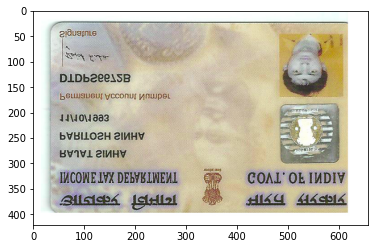

In [18]:

image = cv2.flip(img, 0)
plt.imshow(image)
plt.show()

In [84]:
import math
from typing import Tuple, Union

import cv2
import easyocr
import numpy as np
from PIL import Image
import face_recognition
from deskew import determine_skew

## initialize reader
# reader = easyocr.Reader(['en'], gpu=False)

def read_image(image_filepath):
    try:
#         image = Image.open(image).convert('RGB')
        image = cv2.imread(image_filepath)
        return image
    except:
        return

def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

def is_image_upside_down(img):
    
    face_locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, face_locations)
    image_is_upside_down = (len(encodings) == 0)
    return image_is_upside_down

def fix_orientation(image):

    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    angle = determine_skew(grayscale)
    print(angle)
    if is_image_upside_down(image):
        print('upside down')
        angle += 180
    
    rotated = rotate(image, angle, (0, 0, 0)) 
    return rotated

-88.99441340782124


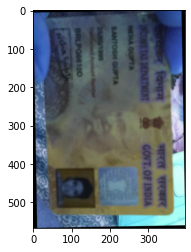

In [85]:
filename = '/home/anmol/Pictures/Selection_005.png'

# Load file, converting to grayscale
img = read_image(filename)
img = fix_orientation(img)
plt.imshow(img)
plt.show()

In [88]:
from datetime import datetime

datetime(2020, 12, 1)

datetime.datetime(2020, 12, 1, 0, 0)